In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

In [2]:
# 1. 데이터 로드 및 전처리
df = pd.read_csv('C:/resources/5weeks/DSA_features.csv')
df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.1832,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.2129,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.2128,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.3170,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.2574,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1
5,7.965544,8.1304,7.8691,0.004233,0.065059,0.576279,1.150181,1.2274,1.07910,0.000746,...,0.000768,0.009040,-0.055772,-0.053614,-0.057971,7.603259e-07,0.000872,0.016200,sitting,p1
6,7.923159,8.0482,7.8543,0.001490,0.038600,0.807007,1.161473,1.2125,1.09410,0.000442,...,0.000759,-0.018338,-0.055931,-0.054186,-0.057954,7.299607e-07,0.000854,-0.090742,sitting,p1
7,7.941025,8.0559,7.8468,0.003056,0.055283,0.284582,1.166265,1.2418,1.09370,0.000501,...,0.000771,0.138991,-0.056112,-0.054114,-0.058301,7.268286e-07,0.000853,-0.129864,sitting,p1
8,7.882650,8.0483,7.6304,0.009832,0.099157,-0.062036,1.179440,1.2714,1.01980,0.001466,...,0.000857,-0.241564,-0.056329,-0.054376,-0.058577,7.286492e-07,0.000854,-0.051455,sitting,p1
9,7.902089,8.0484,7.8318,0.002280,0.047751,0.680589,1.212818,1.2713,1.16010,0.000399,...,0.000777,0.071582,-0.056273,-0.054379,-0.058204,5.838899e-07,0.000764,0.271062,sitting,p1


In [3]:
# activity의 sitting과 jumping만 필터링
df = df[df['activity'].isin(['sitting', 'jumping'])]

In [4]:
df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.18320,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,sitting,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.21290,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,sitting,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.21280,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,sitting,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.31700,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,sitting,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.25740,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,sitting,p1
5,7.965544,8.1304,7.8691,0.004233,0.065059,0.576279,1.150181,1.22740,1.07910,0.000746,...,0.000768,0.009040,-0.055772,-0.053614,-0.057971,7.603259e-07,0.000872,0.016200,sitting,p1
6,7.923159,8.0482,7.8543,0.001490,0.038600,0.807007,1.161473,1.21250,1.09410,0.000442,...,0.000759,-0.018338,-0.055931,-0.054186,-0.057954,7.299607e-07,0.000854,-0.090742,sitting,p1
7,7.941025,8.0559,7.8468,0.003056,0.055283,0.284582,1.166265,1.24180,1.09370,0.000501,...,0.000771,0.138991,-0.056112,-0.054114,-0.058301,7.268286e-07,0.000853,-0.129864,sitting,p1
8,7.882650,8.0483,7.6304,0.009832,0.099157,-0.062036,1.179440,1.27140,1.01980,0.001466,...,0.000857,-0.241564,-0.056329,-0.054376,-0.058577,7.286492e-07,0.000854,-0.051455,sitting,p1
9,7.902089,8.0484,7.8318,0.002280,0.047751,0.680589,1.212818,1.27130,1.16010,0.000399,...,0.000777,0.071582,-0.056273,-0.054379,-0.058204,5.838899e-07,0.000764,0.271062,sitting,p1


In [5]:
#곁측치 확인
df.isnull().values.any()

False

In [6]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder로 'sitting'과 'jumping'을 1과 0로 변환
le = LabelEncoder()
df['activity'] = le.fit_transform(df['activity'])

C:\anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [7]:
df

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity,people
0,7.975714,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.18320,0.99744,0.002208,...,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,1,p1
1,7.978250,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.21290,1.05810,0.000784,...,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,1,p1
2,7.970894,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.21280,1.07960,0.000508,...,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,1,p1
3,7.938412,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.31700,1.07870,0.002173,...,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,1,p1
4,7.908930,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.25740,1.09450,0.000662,...,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,1,p1
5,7.965544,8.1304,7.8691,0.004233,0.065059,0.576279,1.150181,1.22740,1.07910,0.000746,...,0.000768,0.009040,-0.055772,-0.053614,-0.057971,7.603259e-07,0.000872,0.016200,1,p1
6,7.923159,8.0482,7.8543,0.001490,0.038600,0.807007,1.161473,1.21250,1.09410,0.000442,...,0.000759,-0.018338,-0.055931,-0.054186,-0.057954,7.299607e-07,0.000854,-0.090742,1,p1
7,7.941025,8.0559,7.8468,0.003056,0.055283,0.284582,1.166265,1.24180,1.09370,0.000501,...,0.000771,0.138991,-0.056112,-0.054114,-0.058301,7.268286e-07,0.000853,-0.129864,1,p1
8,7.882650,8.0483,7.6304,0.009832,0.099157,-0.062036,1.179440,1.27140,1.01980,0.001466,...,0.000857,-0.241564,-0.056329,-0.054376,-0.058577,7.286492e-07,0.000854,-0.051455,1,p1
9,7.902089,8.0484,7.8318,0.002280,0.047751,0.680589,1.212818,1.27130,1.16010,0.000399,...,0.000777,0.071582,-0.056273,-0.054379,-0.058204,5.838899e-07,0.000764,0.271062,1,p1


In [8]:
from sklearn.preprocessing import StandardScaler

data = df.drop(['people'], axis=1)

data['T_xacc_mean'] = StandardScaler().fit_transform(data['T_xacc_mean'].values.reshape(-1, 1))
data

,T_xacc_mean,T_xacc_max,T_xacc_min,T_xacc_var,T_xacc_std,T_xacc_skew,T_yacc_mean,T_yacc_max,T_yacc_min,T_yacc_var,...,LL_ymag_var,LL_ymag_std,LL_ymag_skew,LL_zmag_mean,LL_zmag_max,LL_zmag_min,LL_zmag_var,LL_zmag_std,LL_zmag_skew,activity
0,-0.991082,8.1605,7.6823,0.014395,0.119981,-0.023319,1.083150,1.18320,0.99744,0.002208,...,6.267229e-07,0.000792,0.177075,-0.057119,-0.054963,-0.059241,6.778722e-07,0.000823,0.036729,1
1,-0.988048,8.1763,7.8472,0.007551,0.086896,0.552416,1.140865,1.21290,1.05810,0.000784,...,7.403458e-07,0.000860,-0.286918,-0.057268,-0.054945,-0.059589,7.032302e-07,0.000839,0.347471,1
2,-0.996852,8.0860,7.8470,0.003092,0.055603,0.100538,1.140962,1.21280,1.07960,0.000508,...,5.802523e-07,0.000762,-0.134430,-0.057068,-0.054711,-0.059065,6.268222e-07,0.000792,0.045579,1
3,-1.035725,8.1083,7.6901,0.003763,0.061343,-0.231914,1.165260,1.31700,1.07870,0.002173,...,5.398837e-07,0.000735,0.021485,-0.056422,-0.053670,-0.058310,8.011245e-07,0.000895,0.240690,1
4,-1.071009,8.1305,7.8322,0.001741,0.041731,2.042285,1.187504,1.25740,1.09450,0.000662,...,6.787533e-07,0.000824,-0.148229,-0.055801,-0.053313,-0.057815,6.853423e-07,0.000828,0.258429,1
5,-1.003254,8.1304,7.8691,0.004233,0.065059,0.576279,1.150181,1.22740,1.07910,0.000746,...,5.900169e-07,0.000768,0.009040,-0.055772,-0.053614,-0.057971,7.603259e-07,0.000872,0.016200,1
6,-1.053979,8.0482,7.8543,0.001490,0.038600,0.807007,1.161473,1.21250,1.09410,0.000442,...,5.754216e-07,0.000759,-0.018338,-0.055931,-0.054186,-0.057954,7.299607e-07,0.000854,-0.090742,1
7,-1.032598,8.0559,7.8468,0.003056,0.055283,0.284582,1.166265,1.24180,1.09370,0.000501,...,5.948995e-07,0.000771,0.138991,-0.056112,-0.054114,-0.058301,7.268286e-07,0.000853,-0.129864,1
8,-1.102460,8.0483,7.6304,0.009832,0.099157,-0.062036,1.179440,1.27140,1.01980,0.001466,...,7.339587e-07,0.000857,-0.241564,-0.056329,-0.054376,-0.058577,7.286492e-07,0.000854,-0.051455,1
9,-1.079195,8.0484,7.8318,0.002280,0.047751,0.680589,1.212818,1.27130,1.16010,0.000399,...,6.031111e-07,0.000777,0.071582,-0.056273,-0.054379,-0.058204,5.838899e-07,0.000764,0.271062,1


In [9]:
RANDOM_SEED = 42

In [10]:
# 테스트 레이블을 남겨두는 이유는 나중에 정확도를 비교하기 위해서임
X_train, X_test = train_test_split(data, test_size=0.2, random_state=RANDOM_SEED)
X_train = X_train[X_train.activity == 1]
X_train = X_train.drop(['activity'], axis=1)

y_test = X_test['activity']
X_test = X_test.drop(['activity'], axis=1)

X_train = X_train.values
X_test = X_test.values
X_train.shape

(394, 270)

In [11]:
# 오토인코더 모델

input_dim = X_train.shape[1]
encoding_dim = 14  # 인코딩 차원을 설정 (임의로 설정한 값, 조정 가능)

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
encoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='bce')

In [12]:
# 3. 모델 학습
# 훈련데이터의 0.1 을 validation data로 사용
history = autoencoder.fit(X_train, X_train,
                          epochs=100, 
                          batch_size=256, 
                          shuffle=True, 
                          validation_split = 0.1)

Epoch 1/100
2/2 [==============================] - 0s 87ms/step - loss: 0.6804 - val_loss: 0.6634
Epoch 2/100
2/2 [==============================] - 0s 12ms/step - loss: 0.6605 - val_loss: 0.6391
Epoch 3/100
2/2 [==============================] - 0s 13ms/step - loss: 0.6343 - val_loss: 0.6088
Epoch 4/100
2/2 [==============================] - 0s 11ms/step - loss: 0.6018 - val_loss: 0.5725
Epoch 5/100
2/2 [==============================] - 0s 11ms/step - loss: 0.5631 - val_loss: 0.5288
Epoch 6/100
2/2 [==============================] - 0s 11ms/step - loss: 0.5172 - val_loss: 0.4767
Epoch 7/100
2/2 [==============================] - 0s 11ms/step - loss: 0.4626 - val_loss: 0.4149
Epoch 8/100
2/2 [==============================] - 0s 13ms/step - loss: 0.3983 - val_loss: 0.3440
Epoch 9/100
2/2 [==============================] - 0s 11ms/step - loss: 0.3236 - val_loss: 0.2619
Epoch 10/100
2/2 [==============================] - 0s 11ms/step - loss: 0.2381 - val_loss: 0.1671
Epoch 11/100
2/2 [=

2/2 [==============================] - 0s 11ms/step - loss: -264.9661 - val_loss: -270.7926
Epoch 82/100
2/2 [==============================] - 0s 11ms/step - loss: -279.3336 - val_loss: -285.3725
Epoch 83/100
2/2 [==============================] - 0s 11ms/step - loss: -294.3239 - val_loss: -300.5648
Epoch 84/100
2/2 [==============================] - 0s 11ms/step - loss: -309.9882 - val_loss: -316.3870
Epoch 85/100
2/2 [==============================] - 0s 11ms/step - loss: -326.2685 - val_loss: -332.8671
Epoch 86/100
2/2 [==============================] - 0s 12ms/step - loss: -343.1716 - val_loss: -350.0212
Epoch 87/100
2/2 [==============================] - 0s 11ms/step - loss: -360.8340 - val_loss: -367.8573
Epoch 88/100
2/2 [==============================] - 0s 12ms/step - loss: -379.1319 - val_loss: -386.3988
Epoch 89/100
2/2 [==============================] - 0s 12ms/step - loss: -398.1947 - val_loss: -405.6550
Epoch 90/100
2/2 [==============================] - 0s 11ms/step - l

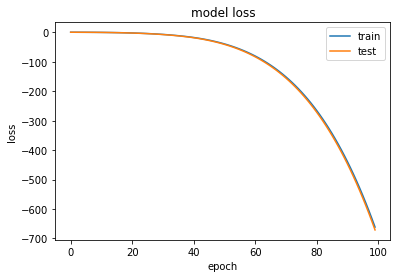

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [24]:
# X_test 값을 넣어서 Reconstruction Error 값을 얻고,
# 실제 레이블인 y_test와 데이터프레임으로 구성
# Reconstruction Error + 실제 레이블의 형태가 됨

decoded_data  = autoencoder.predict(X_test)
reconstruction_error = np.mean(np.abs(X_test - decoded_data), axis=1)
# threshold 값을 조정하여 최선의 정확도를 얻음, 그래프로를 보고 결정

threshold = np.percentile(reconstruction_error, 95)
predictions = (reconstruction_error > threshold).astype(int)
error_df = pd.DataFrame({'reconstruction_error': reconstruction_error,
                         'Predicted Label': predictions,
                         'true_class': y_test})
error_df.describe()

,reconstruction_error,Predicted Label,true_class
count,192.000000,192.000000,192.000000
mean,3.830929,0.052083,0.447917
std,3.243166,0.222776,0.498580
min,0.725693,0.000000,0.000000
25%,0.813336,0.000000,0.000000
50%,3.426945,0.000000,0.000000
75%,6.340384,0.000000,1.000000
max,15.066337,1.000000,1.000000


In [25]:
error_df.head()

,reconstruction_error,Predicted Label,true_class
8516,4.066210,0,0
477,0.899603,0,1
350,0.805216,0,1
8573,9.910676,1,0
8603,5.693027,0,0


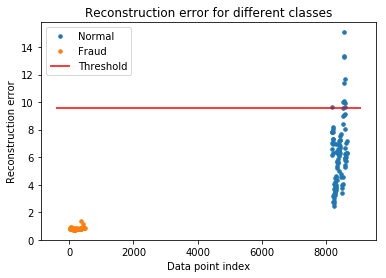

In [26]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

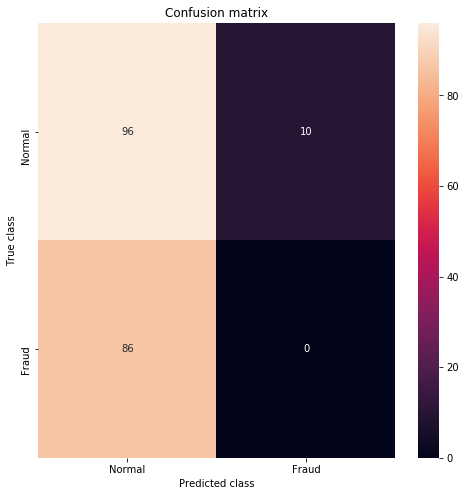

             precision    recall  f1-score   support

          0       0.53      0.91      0.67       106
          1       0.00      0.00      0.00        86

avg / total       0.29      0.50      0.37       192



In [28]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

LABELS = ["Normal", "Fraud"]

y_pred = [1 if e > threshold else 0 for e in error_df.reconstruction_error.values]
conf_matrix = confusion_matrix(error_df.true_class, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title("Confusion matrix")
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.show()

print(classification_report(error_df.true_class, y_pred))

In [29]:
from sklearn.metrics import accuracy_score

# 실제 라벨: 정상(sitting)은 0, 비정상(jumping)은 1로 가정
accuracy = accuracy_score(y_test, predictions)
accuracy

0.5